In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [4]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    'dataset/train/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary' 
)

test_data = test_datagen.flow_from_directory(
    'dataset/test/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

 
 
 
 

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


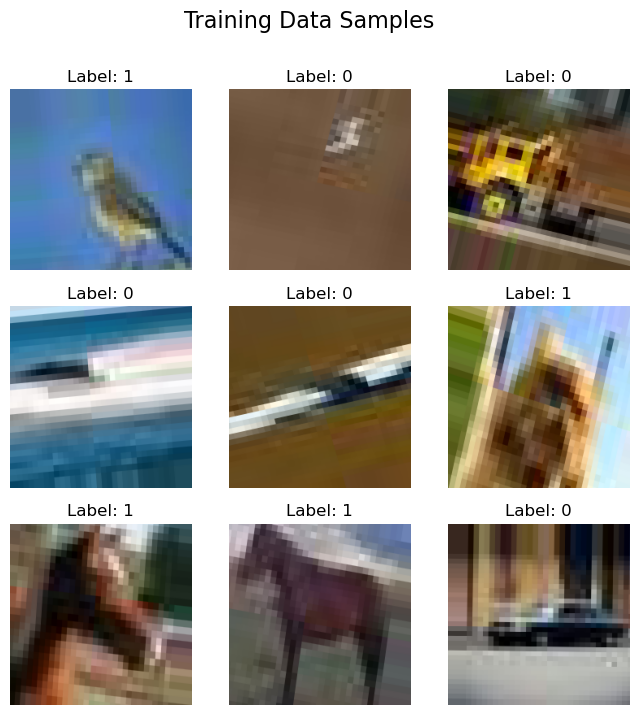

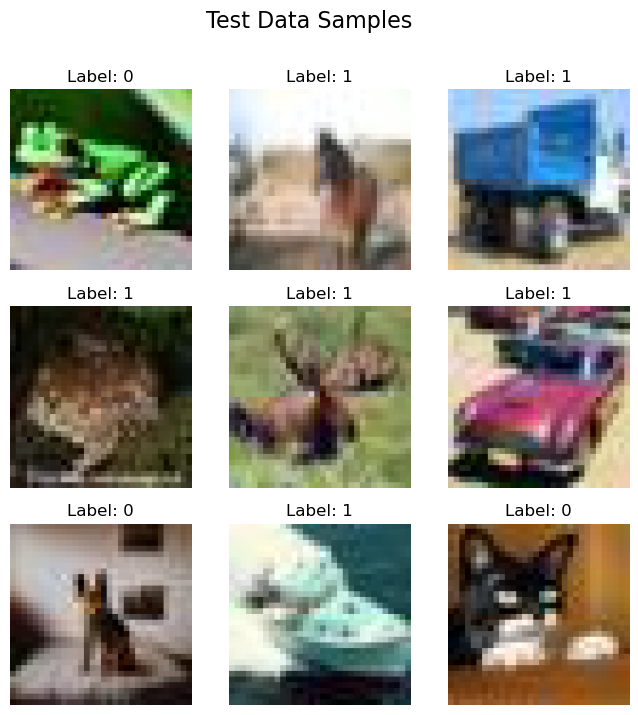

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_images(data, title, num_images=9):
    images, labels = next(data)  
    plt.figure(figsize=(8, 8))
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {int(labels[i])}")  
        plt.axis("off")

    plt.suptitle(title, fontsize=16)
    plt.show()

plot_random_images(train_data, "Training Data Samples")

plot_random_images(test_data, "Test Data Samples")


In [6]:

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(512, activation='relu')(x) 
x = BatchNormalization()(x) 
x = Dropout(0.3)(x)  
output_layer = Dense(1, activation='sigmoid')(x) 


model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,916,417 (11.13 MB)

 Trainable params: 657,409 (2.51 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

In [16]:
epochs = 10

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history =model.fit(train_data, validation_data=test_data, epochs=epochs, callbacks=[reduce_lr, early_stop])


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3077s 983ms/step - accuracy: 0.8294 - loss: 0.3926 - val_accuracy: 0.8731 - val_loss: 0.2997 - learning_rate: 0.0010
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3060s 979ms/step - accuracy: 0.8569 - loss: 0.3315 - val_accuracy: 0.8698 - val_loss: 0.3071 - learning_rate: 0.0010
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3526s 1s/step - accuracy: 0.8633 - loss: 0.3195 - val_accuracy: 0.8759 - val_loss: 0.2923 - learning_rate: 0.0010
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3993s 1s/step - accuracy: 0.8658 - loss: 0.3141 - val_accuracy: 0.8835 - val_loss: 0.2780 - learning_rate: 0.0010
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2546s 815ms/step - accuracy: 0.8700 - loss: 0.3054 - val_accuracy: 0.8843 - val_loss: 0.2708 - learning_rate: 0.0010
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2678s 857ms/step - accuracy: 0.8698 - loss: 0.3065 - val_accuracy: 0.8892 - val_loss: 0.2679 - learning_rate: 0.0010
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2724s 872m

In [30]:
for layer in base_model.layers[-15:]:  
    layer.trainable = True

reduce_lr_fine = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
early_stop_fine = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)


model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

epochs_fine_tune = 10


history_fine_tune = model.fit(
    train_data, 
    validation_data=test_data, 
    epochs=epochs_fine_tune, 
    callbacks=[reduce_lr_fine, early_stop_fine],
    
)

model.save("fake_vs_real_model_Vnew.keras")


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3647s 1s/step - accuracy: 0.8696 - loss: 0.3104 - val_accuracy: 0.9236 - val_loss: 0.1963 - learning_rate: 1.0000e-04
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3628s 1s/step - accuracy: 0.9215 - loss: 0.1954 - val_accuracy: 0.9413 - val_loss: 0.1468 - learning_rate: 1.0000e-04
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3613s 1s/step - accuracy: 0.9348 - loss: 0.1645 - val_accuracy: 0.9283 - val_loss: 0.1850 - learning_rate: 1.0000e-04
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3701s 1s/step - accuracy: 0.9415 - loss: 0.1533 - val_accuracy: 0.9512 - val_loss: 0.1268 - learning_rate: 1.0000e-04
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3508s 1s/step - accuracy: 0.9472 - loss: 0.1370 - val_accuracy: 0.9478 - val_loss: 0.1561 - learning_rate: 1.0000e-04
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3039s 972ms/step - accuracy: 0.9511 - loss: 0.1268 - val_accuracy: 0.9568 - val_loss: 0.1137 - learning_rate: 1.0000e-04
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━

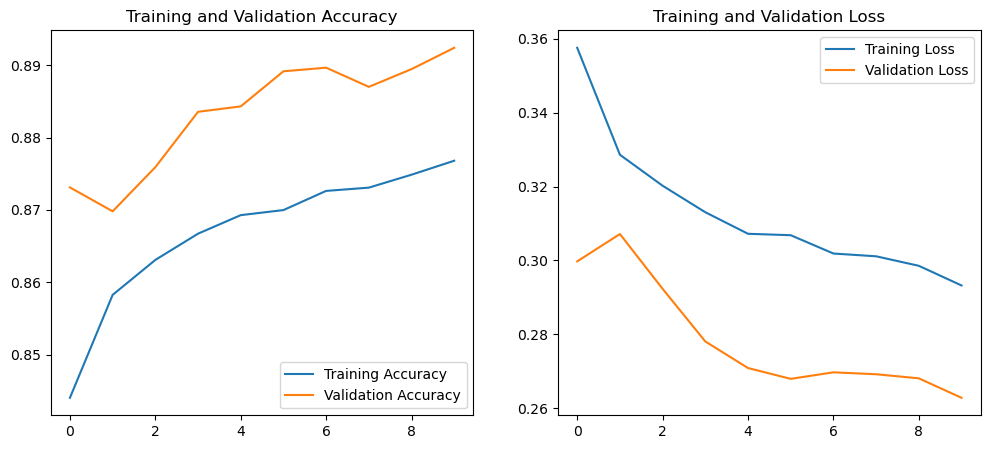

In [31]:
import matplotlib.pyplot as plt

def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()
plot_training(history)

625/625 ━━━━━━━━━━━━━━━━━━━━ 385s 614ms/step


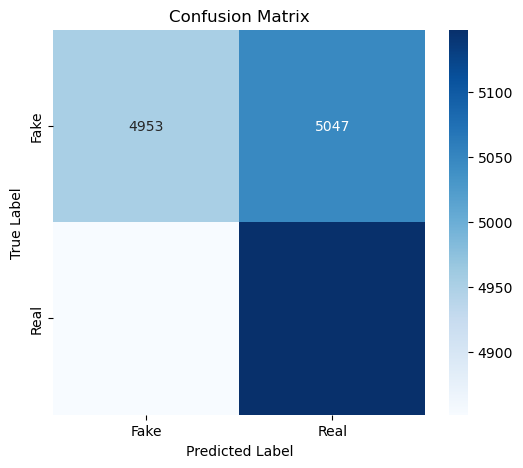

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


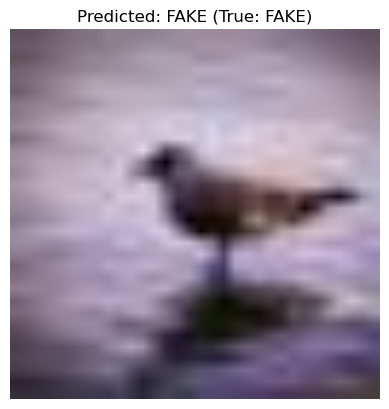

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


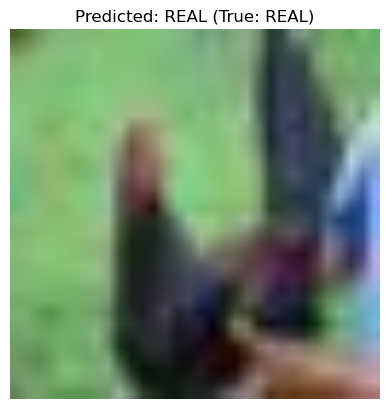

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


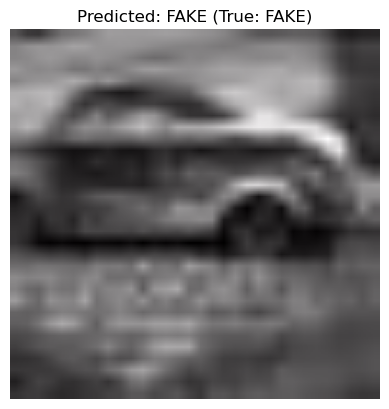

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import cv2


y_true = test_data.classes
y_pred = (model.predict(test_data) > 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

image_paths = ['dataset/test/FAKE/0 (3).jpg', 'dataset/test/REAL/0000 (3).jpg', 'dataset/test/FAKE/0 (2).jpg']
true_labels = ['FAKE', 'REAL', 'FAKE']

for img_path, true_label in zip(image_paths, true_labels):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224)) 
    img_array = img.astype(np.float32) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_label = 'REAL' if (predictions > 0.5).astype(int)[0][0] == 1 else 'FAKE'

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Predicted: {predicted_label} (True: {true_label})')
    plt.show()


In [19]:
print("Fake samples:", np.sum(y_true == 0))
print("Real samples:", np.sum(y_true == 1))


Fake samples: 10000
Real samples: 10000


In [16]:
print(test_data.class_indices)


{'FAKE': 0, 'REAL': 1}


In [34]:
loss, accuracy = model.evaluate(test_data)
print(f"Final Accuracy on Test Set: {accuracy * 100:.2f}%")


625/625 ━━━━━━━━━━━━━━━━━━━━ 356s 570ms/step - accuracy: 0.9602 - loss: 0.1077
Final Accuracy on Test Set: 95.71%
